****
<a id='lesson-3'></a>
# Lesson-3:  Integration
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes: 
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle



## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using thisi adaptive scheme compute the area of unit circle.



## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.

## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using <span style='color:red'> simple </span> Monte Carlo method


## Task-4 
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function. 

When $\rho(x)$ is a probability density function, 
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E} g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$



### Task 4.2: Compute the area of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)



## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion



# Grid Based scheme (Task-1)

 We will plot the area of the unit semi-circle (i.e. unit circle with $y>0$). We know that the exact area of the unit semi-circle is $\pi/2$. So to show the assymptotic convergence with respect to the number of intervals ($N$), we will plot $I(N) / (\pi/2)$, which will assymptotically tend to $1$ as $N\rightarrow\infty$

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:

def ReimannIntegral(func,a,b,numInterval):
    '''Calculate the area under the curve func, between a and b'''
    h = (b-a)/numInterval
    xv = linspace(a,b,numInterval+1)
    fv = func(xv)
    area = h* np.sum ( fv[:-1]) # LEFT REIMANN SUM
    #area = h* np.sum( fv[1:])  # RIGHT REIMANN SUM
    return area

In [3]:
def circle_top(x):
    return sqrt(1-x*x)

In [4]:
iv = []
av = []
for i in arange(10,101,10):
    iv.append(i)
    av.append( ReimannIntegral(circle_top,-1,1,i)*2/pi )

No handles with labels found to put in legend.


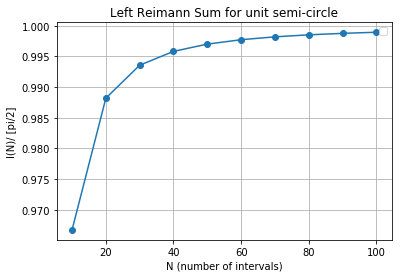

In [5]:
plot(iv,av,'o-')
#xlim([60,100]) ;ylim([0.995,1])

#plot(iv,array(av)-1,'o-',label='Error')

title('Left Reimann Sum for unit semi-circle')
xlabel('N (number of intervals)')
ylabel('I(N)/ [pi/2]')
grid()
legend()

# Adaptive grid method (Task-2)

## Homework
Generic idea is the following: 
1. $x_0 = a$ and set $i=0$
2. for $ x_i < b$, do the following:
     1. $h_i = ?$ ; choose $h_i$ inversely proportional to absolute value of the derivative, $|f^\prime(x_i)|$ 
     2. $x_{i+1} = x_{i} + h_i$
     3. compute the contribution of this interval to integral
     3. check $x_{i+1} < b$, if yes end of the interval reached; else increase $i$

In [15]:
def func(x):
    return sqrt(1-x*x)

a, b = -1, 1
I, x, x_prev = 0, a, a
while x<b:
    h = 1/( abs(func(x)-func(x_prev)/(x-x_prev)) )
    if h > 0.000001:
        x_prev = x
        x += h
        I += func(x)*h
    else :
        
print(I)

nan


/home/rishabh_/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


# Task-3  
Area of quarter circle using naive Monte Carlo


Consider a unit square. Generate $N$ random points _inside_ this square. Consider the quarter circle (or any other shape) that is completely inside the square. We can estimate the are of the quarter circle by using the probilistic argument that the ratio of areas of quarter circle and square equals the fraction of points that lie inside the quarter circle. That is:
$$ \frac{A_c}{A_s} = \lim_{N_s \rightarrow\infty}\frac{N_c}{N_s}
$$
where subsrcipt $c$ and $s$ are used to denote properties of quarter-circle and square respectively; and $A$ stands for area and $N$ stands for number of points 



In [6]:

def Area_MonteCarlo(func,a,b,numPoints):
    ''''''
    a1= array([b-a,1])
    a2=array([a,0])
    inStatistc = 0
    totStatistic =0
    for i in range(numPoints):
        # generate point in x in [a,b] and y in [0,1]
        rv = np.random.random_sample((2,))*a1 + a2
        # test if point is below the curve
        inStatistc += func(rv,1.0) #radius = 1.0
        totStatistic += 1
        # store statistic
        
    # compile statistic to get
    return (b-a)*inStatistc/totStatistic

In [7]:
def inCircle(rv,radius):
    '''returns 1 if point is inside circle of given radius centered about origin '''
    return (norm(rv)<radius)*1.0

In [8]:
iv = []
av = []
numAttempts=1
for i in arange(10,301,10):
    iv.append( i ) 
    sumi=0
    for j in range(numAttempts): 
        sumi+= Area_MonteCarlo(inCircle,-1,1,i)
    sumi /= numAttempts
    av.append( sumi/(0.5*pi) )

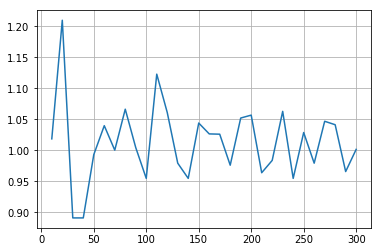

In [9]:
plot(iv,av)
grid()

In [10]:
def MonteCarloIntegration(func,a,b,numPoints):
    '''compute the area under the curve between a and b 
    with numPoints times evaluation of func'''
    
    I = 0.0
    for i in range(numPoints):
        x = np.random.uniform()*(b-a) + a
        I += func(x)
    
    return I*(b-a)/numPoints

In [11]:
def semicircle(x):
    return sqrt(1-x*x)

In [12]:
MonteCarloIntegration(semicircle,-1,1,20)/(pi/2)

0.8902636640806663

In [13]:
# Plot I(N) vs N